In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data (1).csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [5]:
df.describe()

,Склад,Количество
count,301355.000000,301355.000000
mean,2.900652,2.951559
std,1.352221,2.998154
min,1.000000,0.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,4.000000
max,5.000000,200.000000


In [7]:
df.dropna()

,Дата,Склад,Контрагент,Номенклатура,Количество
0,2018-01-04,1,address_0,product_0,4
1,2018-01-04,1,address_0,product_1,4
2,2018-01-04,1,address_0,product_2,5
3,2018-01-04,1,address_0,product_3,10
4,2018-01-04,1,address_0,product_4,2
...,...,...,...,...,...
301350,2018-08-31,5,address_173,product_15,0
301351,2018-08-31,5,address_173,product_17,1
301352,2018-08-31,5,address_173,product_18,1
301353,2018-08-31,5,address_173,product_19,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [11]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

In [13]:
df.isnull().sum()

Дата            0
Склад           0
Контрагент      0
Номенклатура    0
Количество      0
dtype: int64

Сразу переведем столбец "Дата" в правильный формат

In [17]:
df['Дата']=pd.to_datetime(df['Дата'], format='%Y-%m-%d', errors='raise')

In [19]:
df.dtypes

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object

Сгруппируйте данные по дате, посчитайте количество продаж

In [21]:
grouped_df=df.groupby('Дата')['Номенклатура'].count()

In [23]:
print(grouped_df)

Дата
2018-01-04    1840
2018-01-05    1301
2018-01-06    1306
2018-01-07    1322
2018-01-09    1719
              ... 
2018-08-26    1462
2018-08-28    1731
2018-08-29    1497
2018-08-30    1445
2018-08-31    1366
Name: Номенклатура, Length: 205, dtype: int64


In [25]:
grouped_df=df.groupby('Дата')['Номенклатура'].count().reset_index(name='Количество продаж')

In [27]:
print(grouped_df)

          Дата  Количество продаж
0   2018-01-04               1840
1   2018-01-05               1301
2   2018-01-06               1306
3   2018-01-07               1322
4   2018-01-09               1719
..         ...                ...
200 2018-08-26               1462
201 2018-08-28               1731
202 2018-08-29               1497
203 2018-08-30               1445
204 2018-08-31               1366

[205 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [29]:
grouped_df.head(3)

,Дата,Количество продаж
0,2018-01-04,1840
1,2018-01-05,1301
2,2018-01-06,1306


Нарисуйте график продаж у `grouped_df`

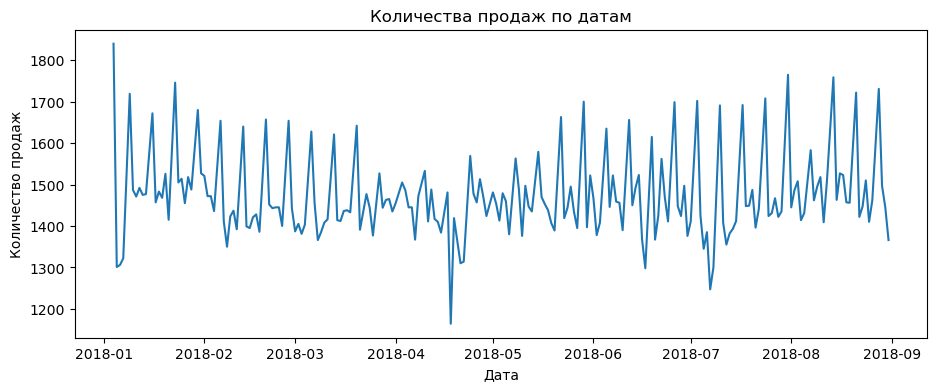

In [31]:
plt.figure(figsize=(11, 4))
plt.title('Количества продаж по датам')
plt.plot(grouped_df['Дата'], grouped_df['Количество продаж'], linestyle='-')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [39]:
Q1 = grouped_df['Количество продаж'].quantile(0.25)
Q3 = grouped_df['Количество продаж'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

outliers = grouped_df[grouped_df['Количество продаж'] > upper_bound]

In [41]:
print(outliers)

          Дата  Количество продаж
0   2018-01-04               1840
4   2018-01-09               1719
10  2018-01-16               1672
16  2018-01-23               1746
22  2018-01-30               1680
28  2018-02-06               1654
34  2018-02-13               1640
40  2018-02-20               1657
46  2018-02-27               1654
52  2018-03-06               1628
64  2018-03-20               1642
117 2018-05-22               1663
123 2018-05-29               1700
129 2018-06-05               1635
135 2018-06-12               1656
147 2018-06-26               1699
153 2018-07-03               1702
159 2018-07-10               1691
165 2018-07-17               1692
171 2018-07-24               1708
177 2018-07-31               1765
189 2018-08-14               1759
195 2018-08-21               1722
201 2018-08-28               1731


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [54]:
df.head()

,Дата,Склад,Контрагент,Номенклатура,Количество
0,2018-01-04,1,address_0,product_0,4
1,2018-01-04,1,address_0,product_1,4
2,2018-01-04,1,address_0,product_2,5
3,2018-01-04,1,address_0,product_3,10
4,2018-01-04,1,address_0,product_4,2


In [62]:
data = 'Дата'
product = 'Номенклатура'
sclad = 'Склад'
count = 'Количество'

In [68]:
sclad_num = 3
df_filtered = df[df[sclad] == sclad_num].copy()

months = [6, 7, 8]
df_filtered = df_filtered[df_filtered[data].dt.month.isin(months)].copy()

wednesday = 2 # Среда = 2 (Понедельник = 0, Вторник = 1, Среда = 2, ...)
df_filtered = df_filtered[df_filtered[data].dt.weekday == wednesday].copy()

grouped_df = df_filtered.groupby(product)[count].sum().reset_index()
top_product = grouped_df.sort_values(by=count, ascending=False).iloc[0] 

In [70]:
print(top_product)

Номенклатура    product_1
Количество           2267
Name: 1, dtype: object


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [77]:
df_weather = pd.read_csv('Astana_2018.csv') 
df_weather.head()

,Дата,Температура
0,2018-08-31,9.6
1,2018-08-31,11.3
2,2018-08-31,12.3
3,2018-08-31,13.2
4,2018-08-31,12.5


In [79]:
df.head()

,Дата,Склад,Контрагент,Номенклатура,Количество
0,2018-01-04,1,address_0,product_0,4
1,2018-01-04,1,address_0,product_1,4
2,2018-01-04,1,address_0,product_2,5
3,2018-01-04,1,address_0,product_3,10
4,2018-01-04,1,address_0,product_4,2


In [154]:
date_column = 'Дата'  

if date_column in df_sales.columns:
    try:
        df_sales[date_column] = pd.to_datetime(df_sales[date_column], format='%Y-%m-%d', errors='raise')  # Укажите формат!
    except ValueError as e:
        print(f"Ошибка при преобразовании '{date_column}' в данных о продажах: {e}")
        exit()
else:
    print(f"Столбец '{date_column}' не найден в данных о продажах.")
    exit()

grouped_sales = df_sales.groupby(date_column).size().reset_index(name='Количество продаж')
grouped_sales = grouped_sales.sort_values(by=date_column)  # Сортируем по дате


df_weather = pd.read_csv('Astana_2018.csv') 

df_weather.rename(columns={'Дата': 'Дата', 'Tемпература': 'T'}, inplace=True)  

if 'Дата' in df_weather.columns:
    try:
        df_weather['Дата'] = pd.to_datetime(df_weather['Дата'], format='%Y-%m-%d', errors='raise')  
        print("\nСтолбец 'Дата' в данных о погоде успешно преобразован.")
    except ValueError as e:
        print(f"\nОшибка при преобразовании 'Дата' в данных о погоде: {e}")
        exit()
else:
    print("\nСтолбец 'Дата' не найден в данных о погоде.")
    exit()


Столбец 'Дата' в данных о погоде успешно преобразован.


In [ ]:
grouped_weather = df_weather.groupby('Дата')['Температура'].mean().reset_index()  '
grouped_weather = grouped_weather.sort_values(by='Дата') 

In [158]:
grouped_weather.head()

,Дата,Температура
0,2018-01-04,-13.0875
1,2018-01-05,-17.2500
2,2018-01-06,-14.1250
3,2018-01-07,-12.3375
4,2018-01-08,-15.4375


In [ ]:
merged_df = pd.merge(grouped_sales, grouped_weather, on='Дата', how='inner')

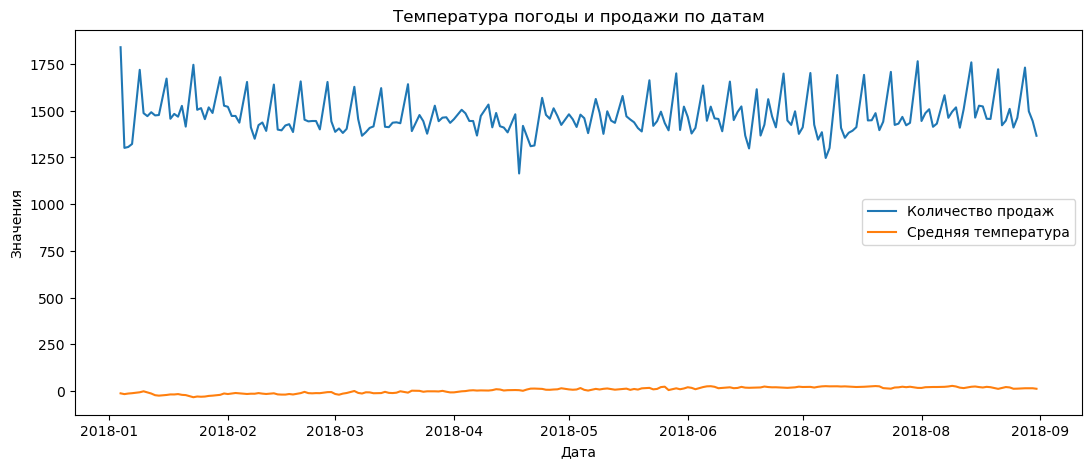

In [172]:
plt.figure(figsize=(13, 5))
plt.title('Температура погоды и продажи по датам')
plt.plot(merged_df['Дата'], merged_df['Количество продаж'], label='Количество продаж')
plt.plot(merged_df['Дата'], merged_df['Температура'], label='Средняя температура')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.legend()
plt.show()

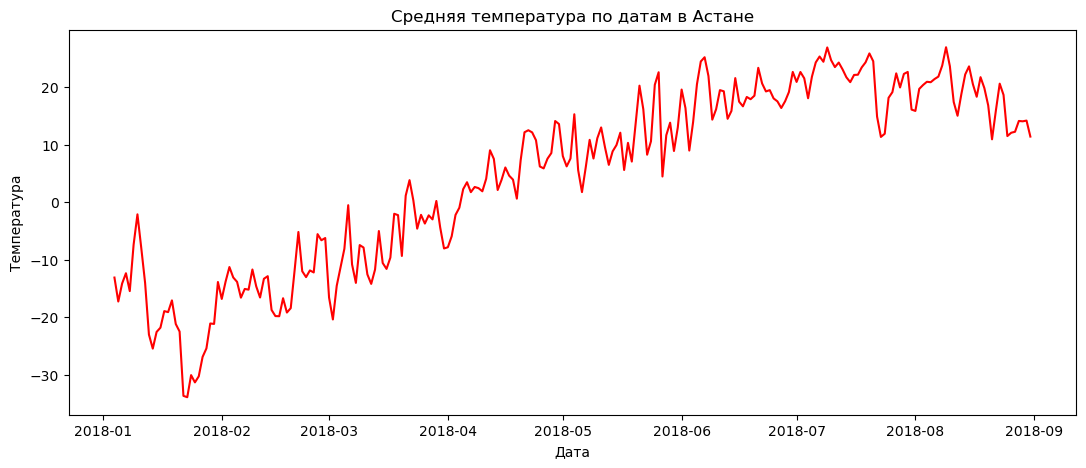

In [174]:
plt.figure(figsize=(13, 5))
plt.title('Средняя температура по датам в Астане')
plt.plot(grouped_weather['Дата'], grouped_weather['Температура'], label='Средняя температура', color='red')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.show()